**Name:**
1.   Krittin Nisunarat 6280782
2.   Khwanchanok Chaichanayothinwatchara 6280164
3.   Vanessa Rujipatanakul 6280204
4.   Pornkamol Luthra 6280012

### Happiness vs. Corruption

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import linregress

### Clean up data

Separate to 2 datasets after cleaning up null value:
1. dataset with social support
2. dataset without social support

**Reason:** some periods of time have different missing values which means that if we drop all 0 value, dataset will remain empty set.

In [3]:
happiness_df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
happiness_df = happiness_df.drop(columns=['family', 'dystopia_residual'])
social_support_df = happiness_df[happiness_df['Year'] > 2016].replace(0, np.nan).dropna()
no_social_support_df = happiness_df.drop(columns=['social_support']).replace(0, np.nan).dropna()

### Find correlation between dataset

In [4]:
def find_coorelation(df):
    corr = df.corr()
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    for column in corr.columns:
        corr[column][column] = 0.0
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return corr

/tmp/ipykernel_4713/953548275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


happiness_score     0.531788
gdp_per_capita      0.357057
health              0.376948
freedom             0.000000
generosity          0.304255
government_trust    0.444022
Year                0.194106
social_support      0.382051
cpi_score           0.456638
Name: freedom, dtype: float64

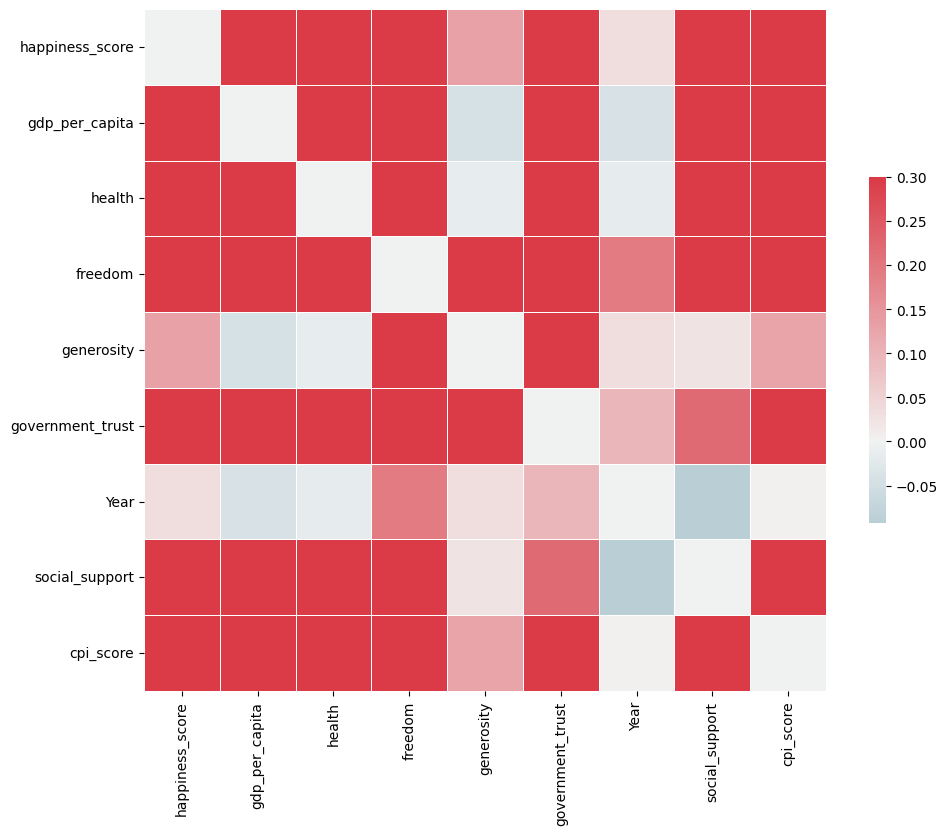

In [5]:
# With social support
find_coorelation(social_support_df)['freedom']

/tmp/ipykernel_4713/953548275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,Year,cpi_score
happiness_score,0.000000,0.795855,0.761863,0.545431,0.153569,0.455927,0.030196,0.690665
gdp_per_capita,0.795855,0.000000,0.772122,0.353552,-0.011118,0.365863,-0.028932,0.703940
health,0.761863,0.772122,0.000000,0.410866,-0.016377,0.325699,0.077540,0.648858
freedom,0.545431,0.353552,0.410866,0.000000,0.291749,0.468122,0.065431,0.487229
generosity,0.153569,-0.011118,-0.016377,0.291749,0.000000,0.280098,-0.106708,0.170834
government_trust,0.455927,0.365863,0.325699,0.468122,0.280098,0.000000,0.023120,0.624193
Year,0.030196,-0.028932,0.077540,0.065431,-0.106708,0.023120,0.000000,0.000397
cpi_score,0.690665,0.703940,0.648858,0.487229,0.170834,0.624193,0.000397,0.000000


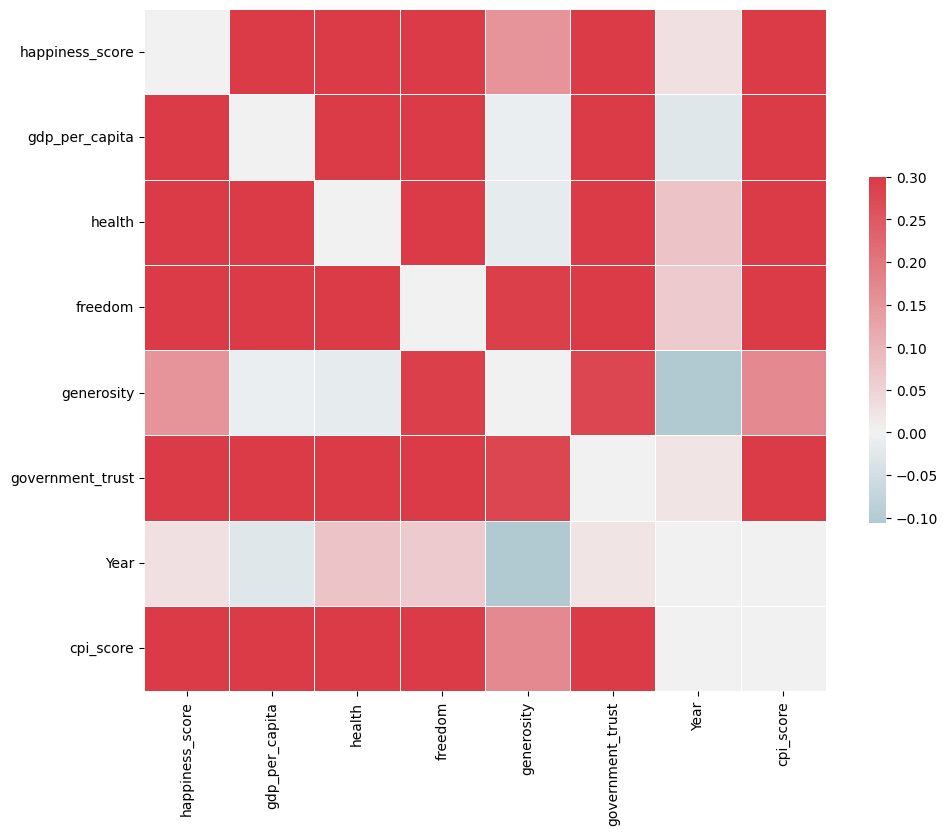

In [6]:
# Without social support
find_coorelation(no_social_support_df)

### 1. Happiness Trend
**Interested Question:** 
- What is the happiness trend of each continent over the years? 
- What will happiness score look like in 2021? 
- Which continent seems to improve at the fastest rate?

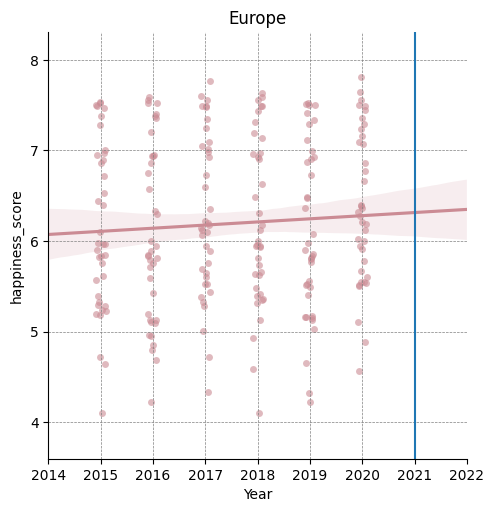

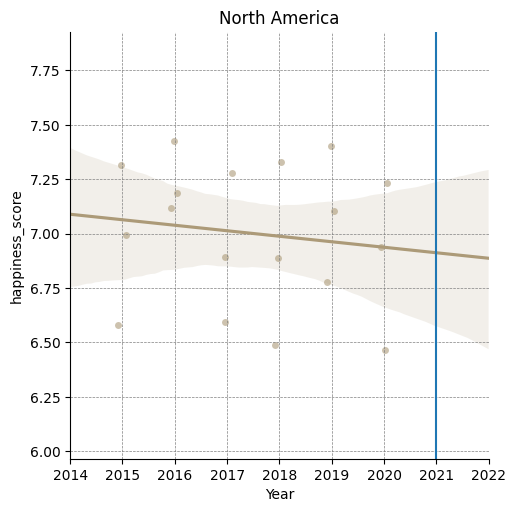

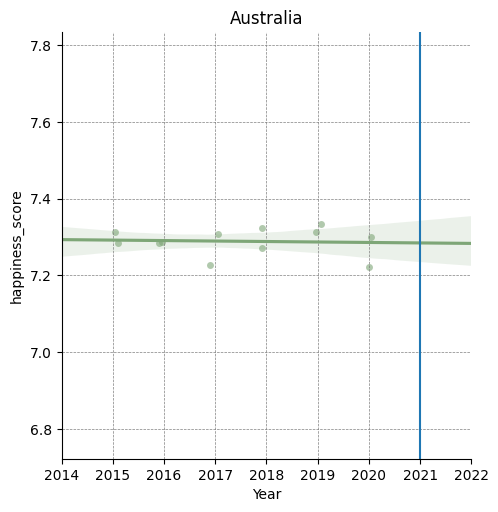

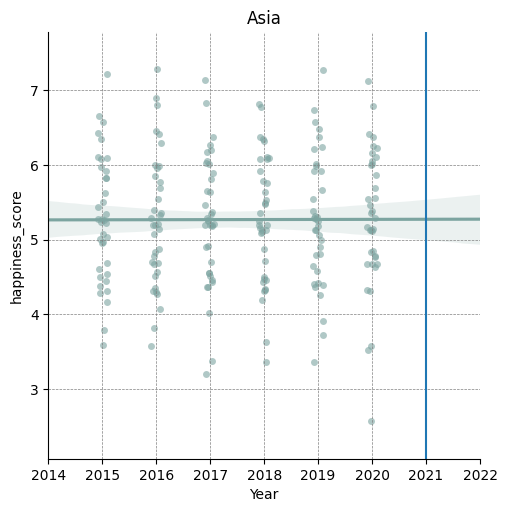

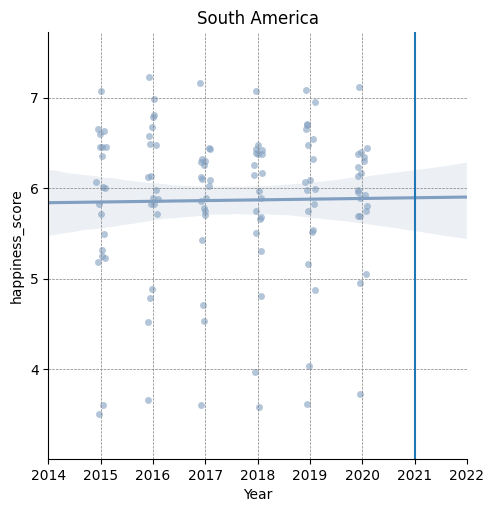

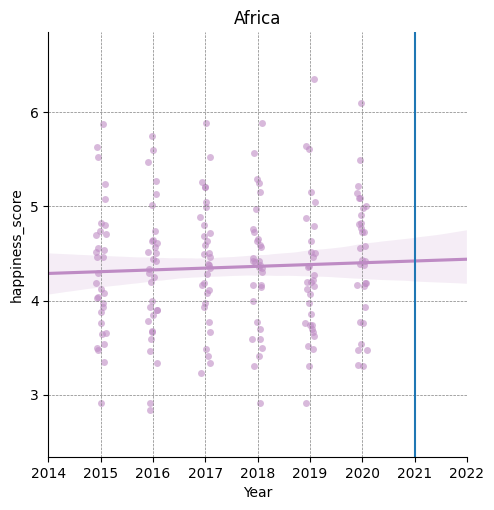

In [7]:
def generate_happiness_trend_graph(df, color):
    g = sns.catplot(x="Year", y="happiness_score",alpha=0.6, color=color, zorder=1,native_scale=True, data=df)
    g.set(xlim=(2014, 2022), ylim=(df['happiness_score'].min() - 0.5, df['happiness_score'].max() + 0.5))
    sns.regplot(x='Year', y='happiness_score',color=color, data=df, scatter=False, truncate=False)
    plt.axvline(2021)
    plt.grid(color='gray', linestyle='--', lw=0.5)
    plt.title(df['continent'].max())

    
colors = sns.husl_palette(s=.4)
for continent, color in zip(happiness_df['continent'].unique(), colors):
    df = happiness_df[happiness_df['continent'] == continent]
    generate_happiness_trend_graph(df, color)

### 2. The Happiest of All
**Interested Question:** 
- Overall, what is the happiest and saddest continent? 
- Is the happiest country in the happiest continent?
- Is the saddest country in the saddest continent?

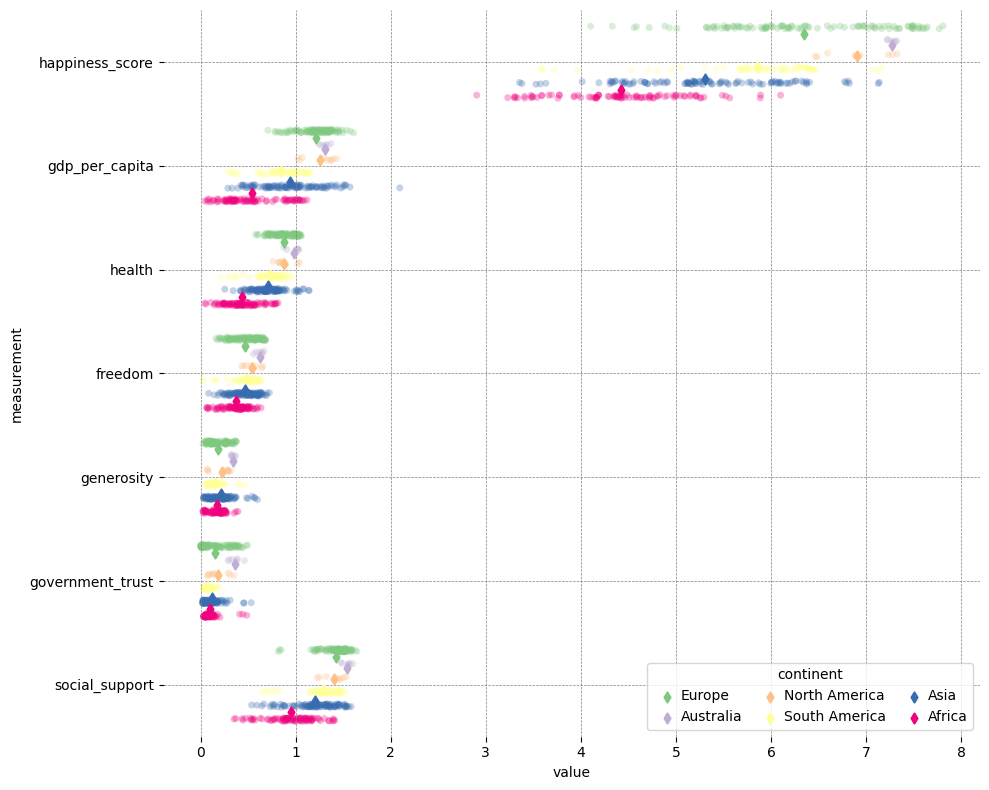

In [8]:
happiness_melted_df = social_support_df.drop(axis=1,columns=['Country', 'cpi_score', 'Year'])
happiness_melted_df = pd.melt(happiness_melted_df, "continent", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
t = sns.stripplot(
    data=happiness_melted_df, x="value", y="measurement", hue="continent",palette="Accent",
    dodge=True, alpha=.3, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=happiness_melted_df, x="value", y="measurement", hue="continent",
    join=False, dodge=.8 - .8 / 3, palette="Accent",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)
plt.grid(color='gray', linestyle='--', lw=0.5)
f.tight_layout()

In [9]:
# happiest continent
social_support_df.groupby('continent')['happiness_score'].mean().idxmax()

'Australia'

In [10]:
# happiest country
social_support_df.groupby('Country')['happiness_score'].mean().idxmax()

'Finland'

In [11]:
# saddest continent
social_support_df.groupby('continent')['happiness_score'].mean().idxmin()

'Africa'

In [12]:
# saddest country
# Remark: this country is in Africa
social_support_df.groupby('Country')['happiness_score'].mean().idxmin()

'Tanzania'

### 3. Happiness Score vs CPI Score
**Interested Question:** Will citizens be happier if there is less corruption?

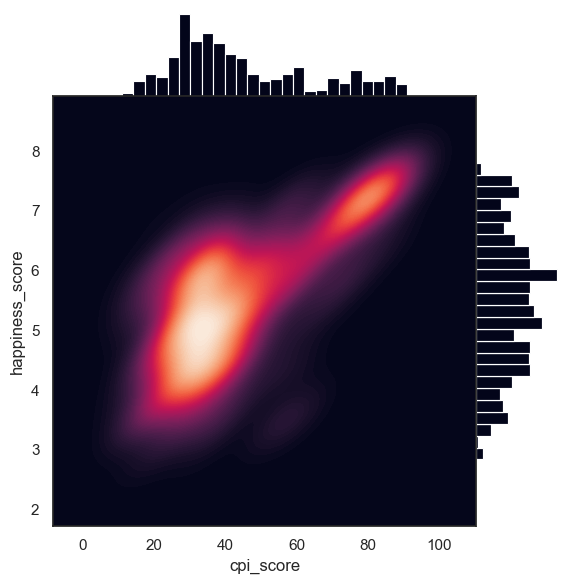

In [185]:
# Answer: positive correlation
sns.set_theme(style="white")
g = sns.JointGrid(data=no_social_support_df, x="cpi_score", y="happiness_score", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

### 4. Freedom vs. Government Trust
**Interested Question:** How does the freedom citizen have affect the trust in government?

### 5. CPI Score vs Government Trust
**Interested Question:** How does each country's cpi score impact citizen's trust in government?

In [13]:
cpi = happiness_df.groupby('Country')['cpi_score'].mean()
gov = happiness_df.groupby('Country')['government_trust'].mean()
continent = happiness_df.groupby('Country')['continent'].max()
cpi_gov_df = pd.concat([cpi, gov, continent], axis=1)

In [14]:
def exponential_curve_fit(x, a, b, c):
    return a*x**2 + b*x + c

fitted_model, _ = curve_fit(exponential_curve_fit,xdata=cpi_gov_df['cpi_score'],ydata=cpi_gov_df['government_trust'])
fitted_model

array([ 1.32196890e-04, -1.02360894e-02,  2.69906526e-01])

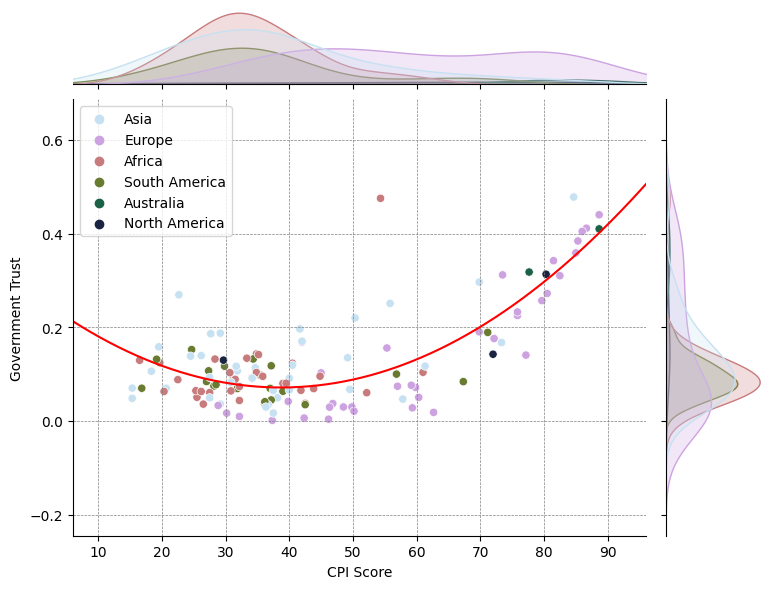

In [15]:
# xs = cpi_gov_df['cpi_score'].sort_values()
xs = np.linspace(happiness_df['cpi_score'].min() - 5, happiness_df['cpi_score'].max() + 5, 1000)
t = sns.jointplot(data=cpi_gov_df,x='cpi_score', y='government_trust',hue='continent', palette='cubehelix_r',legend=True)
t.ax_marg_x.set_xlim(happiness_df['cpi_score'].min() - 5, happiness_df['cpi_score'].max() + 5)
sns.lineplot(x=xs, y=exponential_curve_fit(xs, *fitted_model),color='red')
plt.grid(color='gray', linestyle='--', lw=0.5)
plt.xlabel('CPI Score')
plt.ylabel('Government Trust')
t.fig.set_figwidth(8)

### (Bonus?) Happiness Score Factors
**Interested Question:**
- What are the main factors that contribute to each country's happiness scores in 2020?
- Eg., What is the main factor that causes Finland's score to be high? 

In [16]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

latest_year_happiness_df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')

latest_year_happiness_df = latest_year_happiness_df[latest_year_happiness_df['Year'] == 2020].drop(columns=['cpi_score', 'Year', 'family'])

latest_year_happiness_df = df_column_switch(latest_year_happiness_df, 'social_support', 'continent')

latest_year_happiness_df = latest_year_happiness_df.sort_values(by='happiness_score', ascending=False)
latest_year_happiness_df

,Country,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,dystopia_residual,social_support,continent
660,Finland,7.8087,1.285190,0.961271,0.662317,0.159670,0.477857,2.762835,1.499526,Europe
661,Denmark,7.6456,1.326949,0.979333,0.665040,0.242793,0.495260,2.432741,1.503449,Europe
662,Switzerland,7.5599,1.390774,1.040533,0.628954,0.269056,0.407946,2.350267,1.472403,Europe
663,Iceland,7.5045,1.326502,1.000843,0.661981,0.362330,0.144541,2.460688,1.547567,Europe
664,Norway,7.4880,1.424207,1.008072,0.670201,0.287985,0.434101,2.168266,1.495173,Europe
...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.033407,0.101786,0.257241,1.085695,Africa
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.271541,0.203881,0.718963,0.872675,Africa
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.235705,0.485542,0.548445,0.522876,Africa
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.151349,0.080929,0.841031,1.047835,Africa


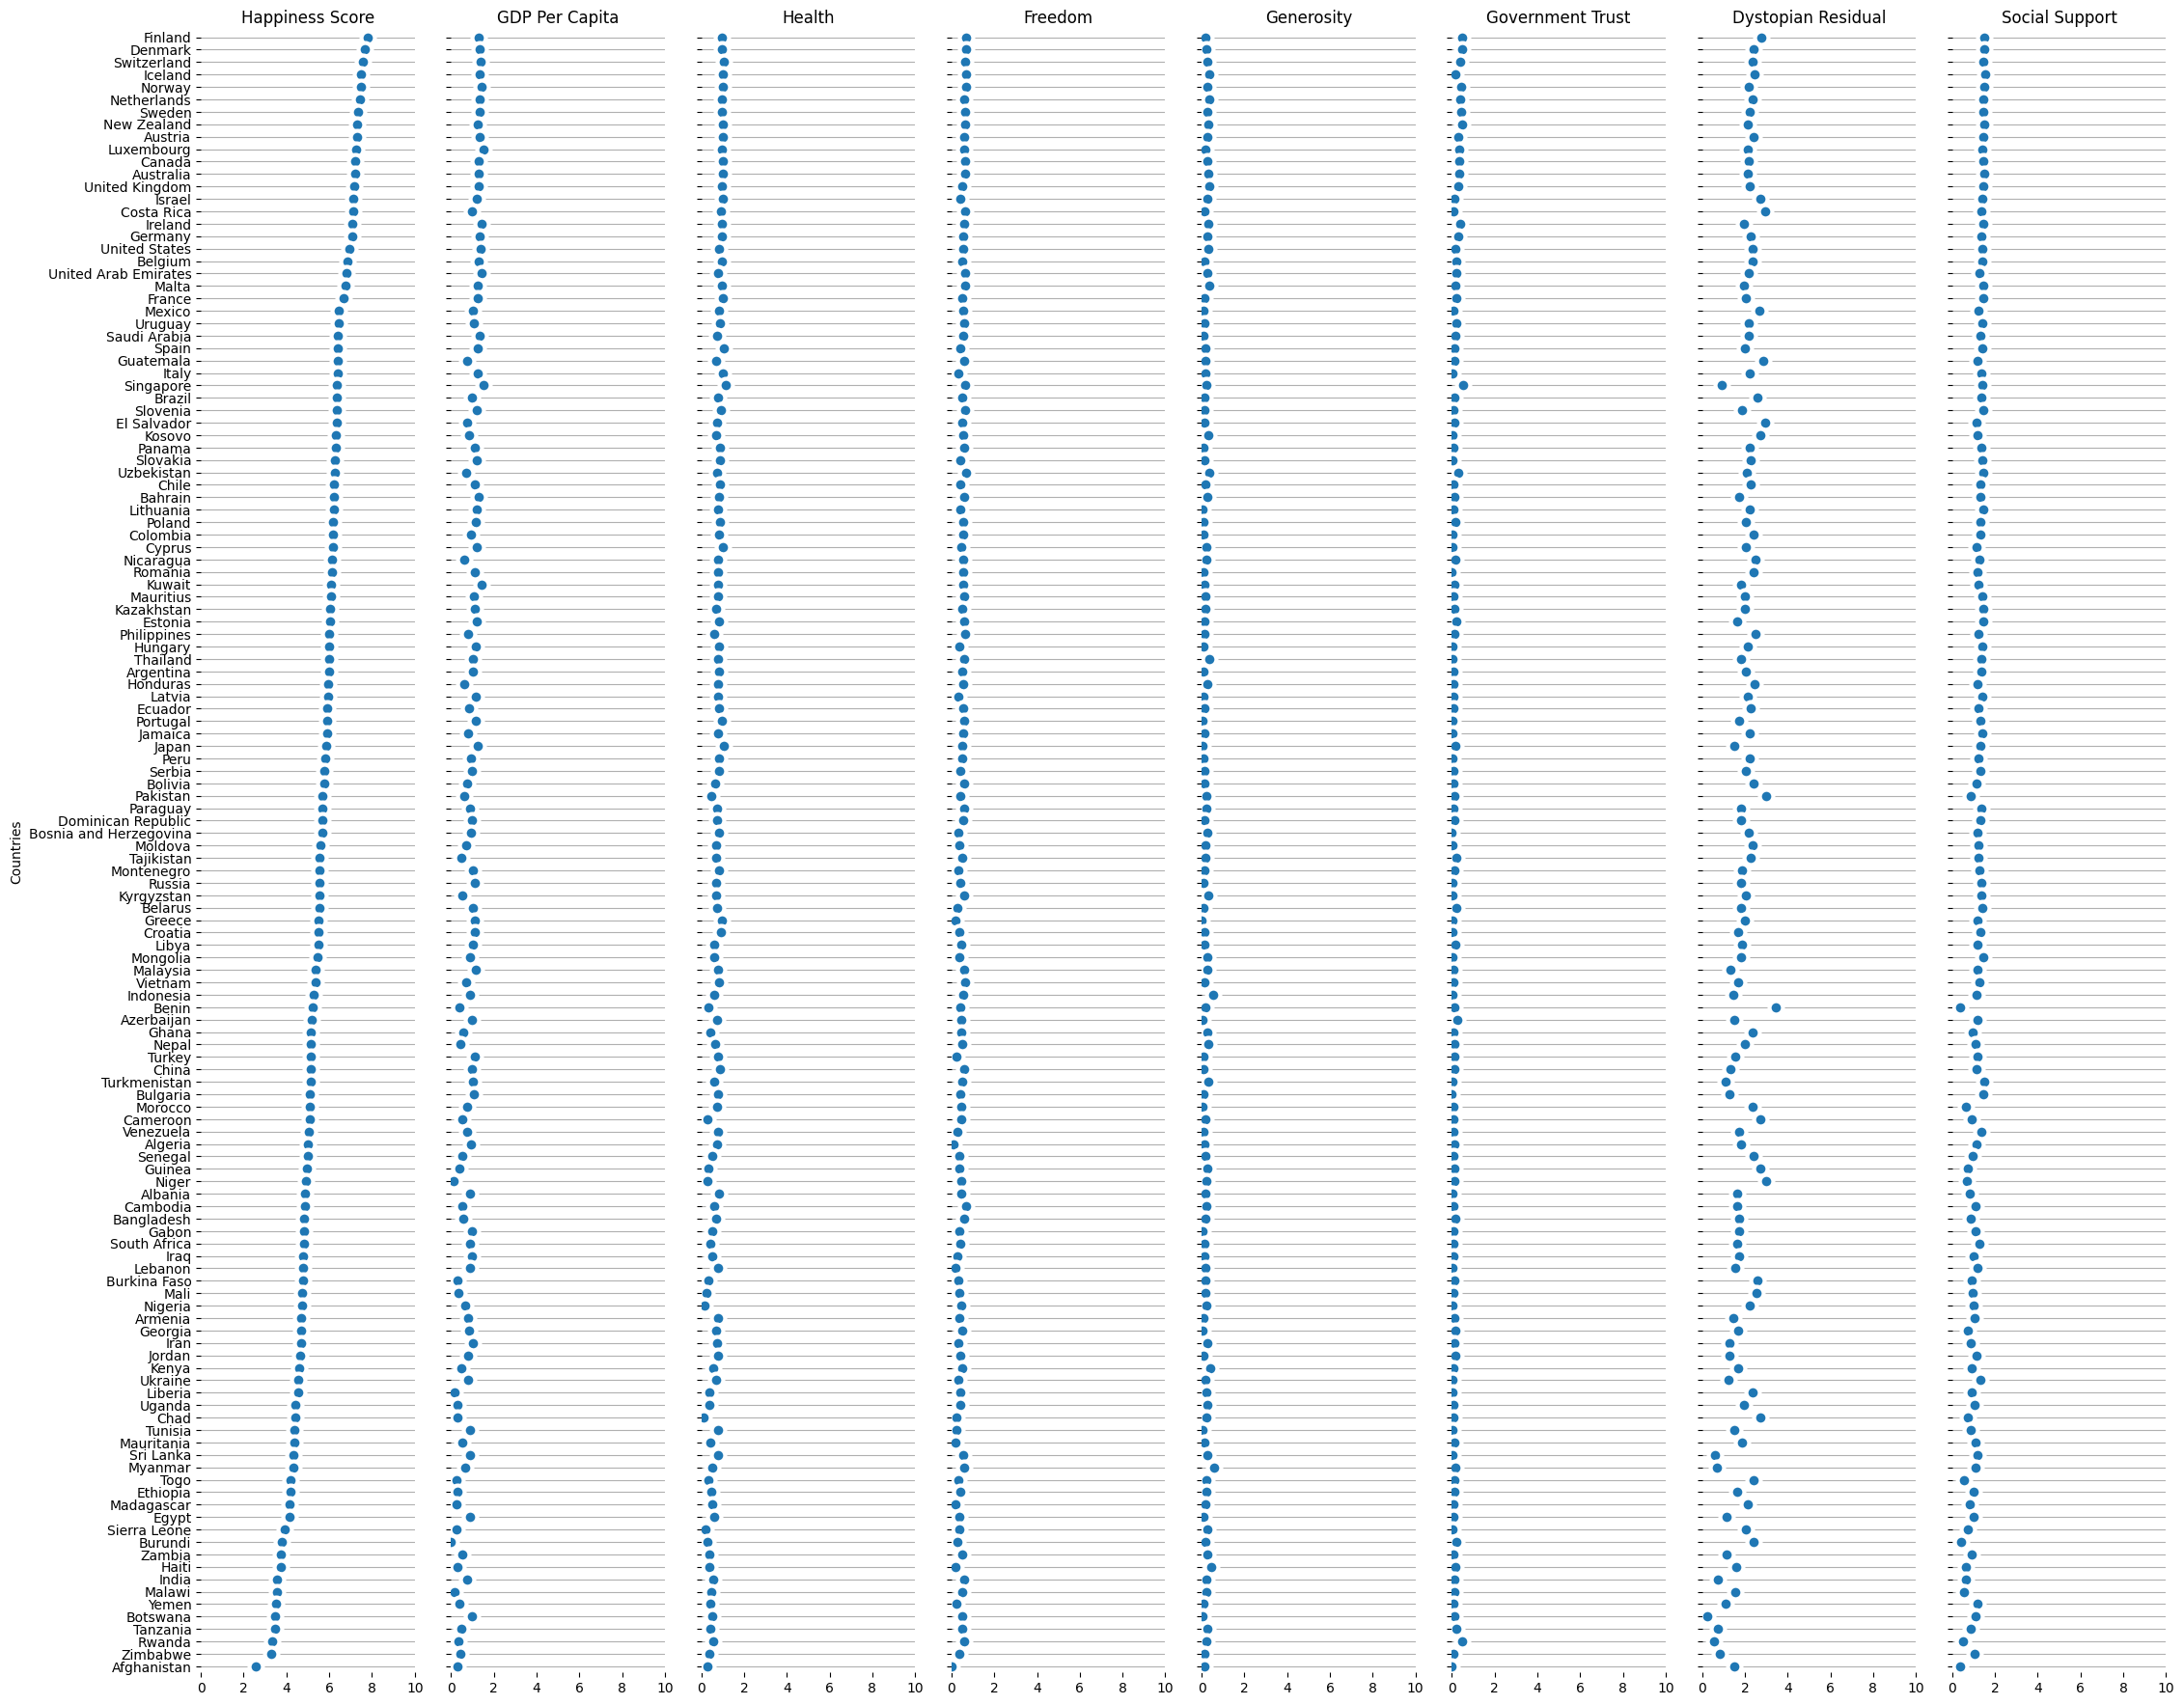

In [17]:
g = sns.PairGrid(latest_year_happiness_df,
                 x_vars=latest_year_happiness_df.columns[1:-1], y_vars=["Country"],
                 height=18, aspect=.15)

# # Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=3, edgecolor="w")

# # # Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 10), xlabel="", ylabel="Countries")

# # Use semantically meaningful titles for the columns
titles = ["Happiness Score", "GDP Per Capita", "Health", "Freedom", "Generosity", 
        "Government Trust", "Dystopian Residual", "Social Support"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)